Task 2: Exploratory Data Analysis (EDA)

Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load and clean

In [3]:
df = pd.read_csv("/content/Iris.csv")
df.drop(columns=["Id"], inplace=True)

1.Generate summary statistics (mean, median, std, etc.).


In [4]:
print("Summary Statistics:\n", df.describe())
print("\nMedian Values:\n", df.median(numeric_only=True))

Summary Statistics:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Median Values:
 SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64


2.Create histograms and boxplots for numeric features.

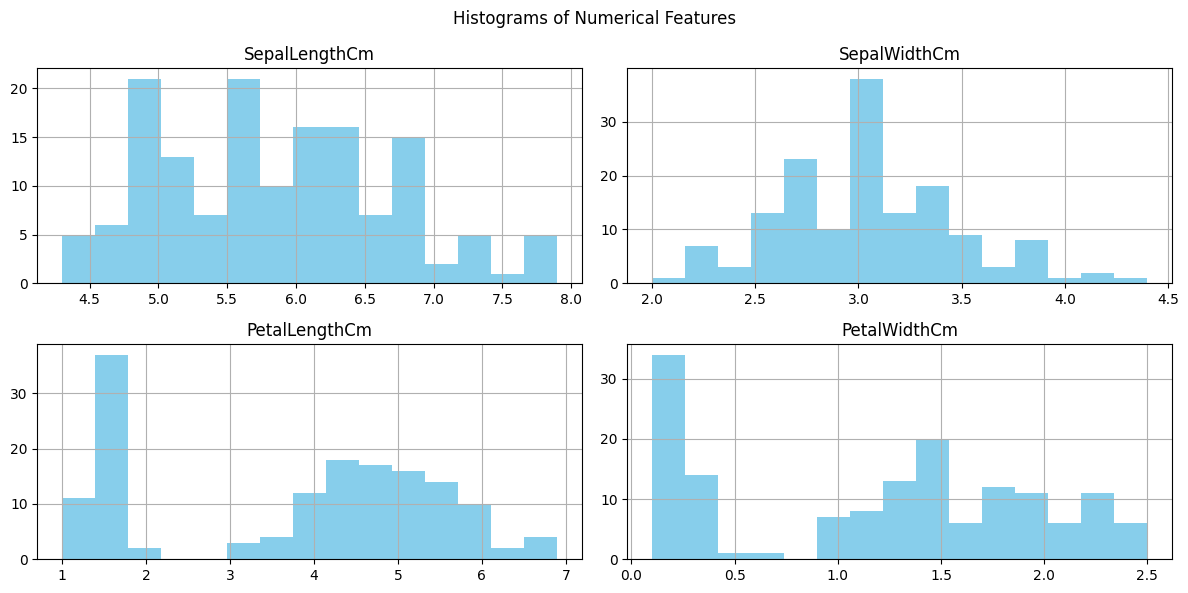

In [5]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(bins=15, figsize=(12, 6), layout=(2, 2), color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

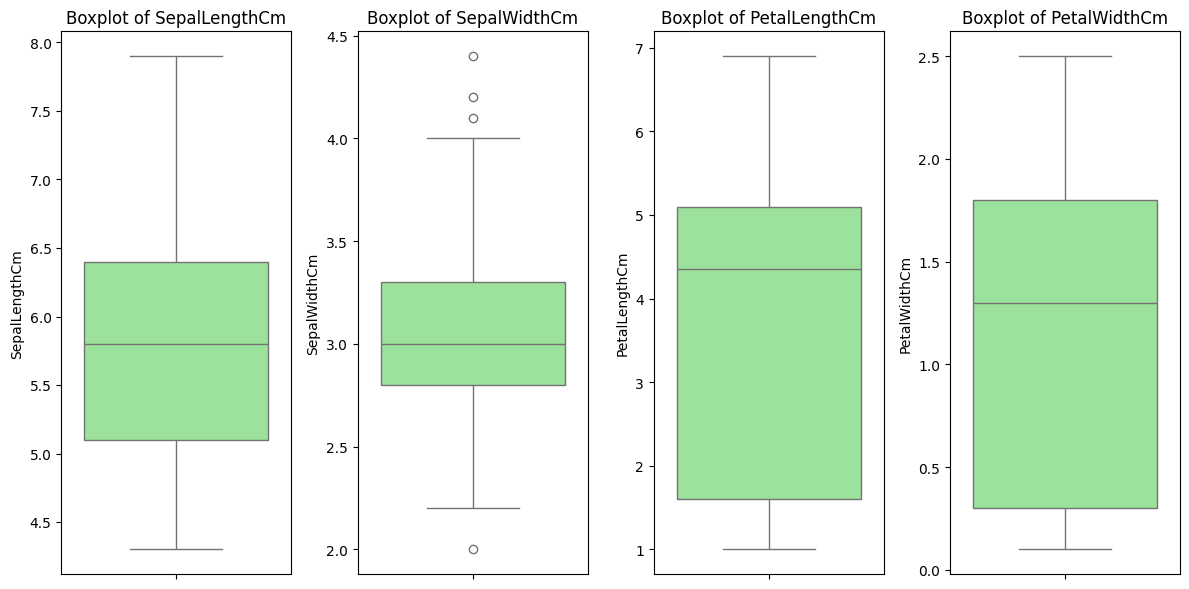

In [7]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

3.Use pairplot/correlation matrix for feature relationships.

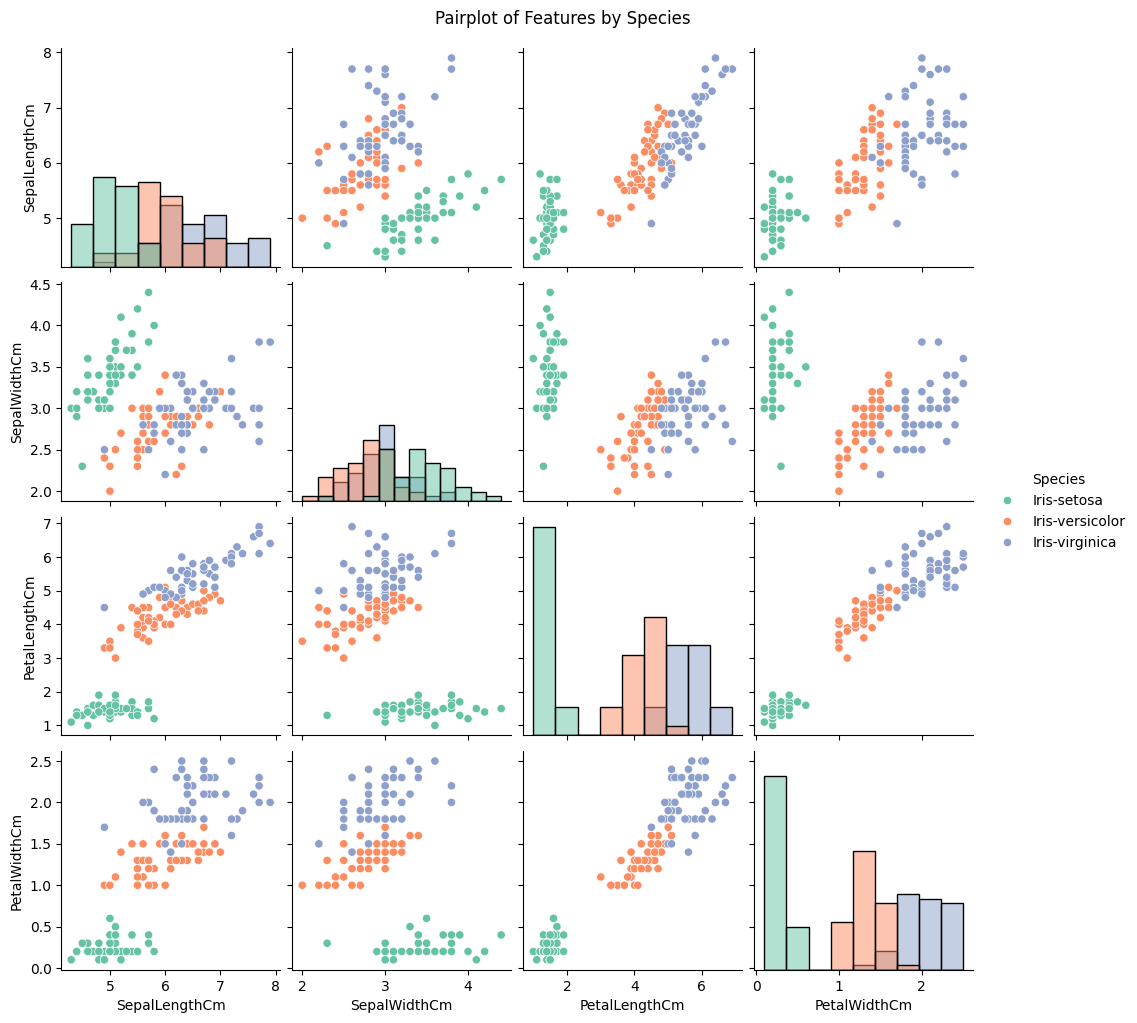

In [8]:
df['Species'] = df['Species'].astype(str)
sns.pairplot(df, hue="Species", palette="Set2", diag_kind="hist")
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()

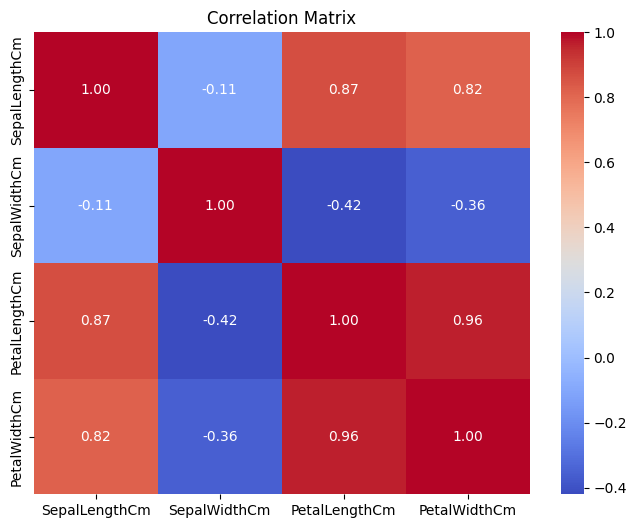

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=["Species"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

4.Identify patterns, trends, or anomalies in the data.

In [10]:
fig = px.scatter(df, x='PetalLengthCm', y='PetalWidthCm', color='Species',
                 title='Petal Length vs Width', template='plotly_dark')
fig.show()

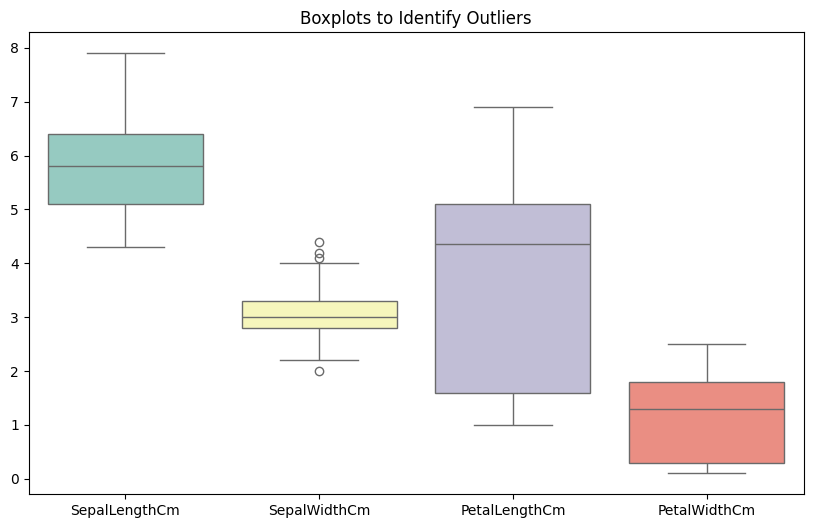

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns], palette="Set3")
plt.title("Boxplots to Identify Outliers")
plt.show()

5.Make basic feature-level inferences from visuals.

In [12]:
print("\nMean feature values by species:\n", df.groupby("Species").mean(numeric_only=True))


Mean feature values by species:
                  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026
